# Tarea 4

### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia. Note que debe incluir (y por lo tanto tener en el mismo directorio) al archivo `choques_utils.jl`.

### Importante 2: ###

Renombre el archivo como: 
**nombre_grupo_tarea_5.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**El objetivo de la tarea es variado:**

1. Familiarizarse con el fenómeno de la formación de choques.
2. Familiarizarse con los métodos de captura de choques.
3. Transitar por el proceso de implementar un nuevo código.




------

**1)** En el directorio encontrará dos notebooks con distintos métodos de captura de choque. 
Uno de segundo orden *KT2* o otro de quinto orden, *MP5*. Ambos evolucionan tanto la ecuación de advección, ($u_t = c u_x$), como la de Burgers, $u_t = \frac{1}{2}(u^2)_x$. Lo hacen en un círculo (condiciones de borde periódicas) de longitud L.

Evolucione ambas (con el MP5): 

1. Para la primera constate que la solución se mueve a velocidad constante.
2. Para la segunda constate que se forma un choque a un dado tiempo. 
    1. Discuta como encontrar cúando se forma el choque y donde.
    2. Vea que el tiempo de formación del choque coincide con el tiempo teórico calculado. 
    3. Observe que el choque decae en el tiempo, encuentre experimentalmente cual es la ley de decaimiento.


In [2]:
using OrdinaryDiffEq
using Plots
using Printf

In [38]:
problem = :advection

:advection

In [161]:
include("choques_utils.jl") # todas las funciones necesarias

createMP5auxvectors (generic function with 1 method)

In [40]:
KurganovTadmor = false
MonotonicityPreserving5 = false
# KurganovTadmor = true
MonotonicityPreserving5 = true

true

In [41]:
#Velocidad máxima de propagación

function advectionspeed(U, c)
    return abs(c)
end

function burgersspeed(U, c)
    return maximum(abs, U)  #no encuentro forma de escribir esto sin que aloque memoria...
end

if problem == :advection
    SpeedMax = advectionspeed
elseif problem == :burgers
    SpeedMax = burgersspeed
end

advectionspeed (generic function with 1 method)

In [42]:
#Flujos
function advection!(F, U, c)
    @. F = c*U
end

function burgers!(F, U, Fpars)
    @. F = 0.5*U*U
end

if problem == :advection
    Flux_x! = advection!
elseif problem == :burgers
    Flux_x! = burgers!
end

advection! (generic function with 1 method)

In [44]:
N = 2000
N_FIELDS = 1

start = 0.0
stop = 2.0*pi
x = range(start, stop =stop, length = N+1)[1:end-1] #de manera que no incluya el último punto
dx = Float64(x.step)  #Δx
h = 1.0/dx
#Inicializamos el dato
u = Array{Float64}(undef, N, N_FIELDS)
du = copy(u)
@. u[:,1] = 0.5 + sin(x)

#Definimos el intervalo de integración y el paso dt
T = 2.0
tspan = (0.0, T)

#CFL = dt/dx
CFL = 0.1
dt = dx * CFL

#Parámetros del problema
if problem == :advection
    eqpars = 1.0
elseif problem == :burgers
    eqpars = false
end

1.0

In [45]:
#Elegimos el método que queremos ver
if KurganovTadmor == true
    θ = 2.0  #Este valor tiene que estar entre 1 y 2. Mientras más cerca de 2, menor disipación.
             #Para sistemas de ecuaciones es mejor que esté más cerca de 1 para evitar oscilaciones.
    auxvectors = createKTauxvectors(N_FIELDS)
    scheme! = KT!
    par = (eqpars, h, θ, Flux_x!, SpeedMax, N, N_FIELDS, auxvectors)
    println("Elegido el método KT")
elseif MonotonicityPreserving5 == true
    auxvectors = createMP5auxvectors(N_FIELDS)
    scheme! = mp5!
    par = (eqpars, h, N, N_FIELDS, Flux_x!, SpeedMax, auxvectors)
    println("Elegido el método MP5")
end

Elegido el método MP5


In [46]:
prob = ODEProblem(scheme!,u,tspan,par);

In [47]:
# sol = solve(prob,SSPRK33(),dt=dt, saveat = T/100); # Esto es un método TVD
sol = solve(prob,SSPRK33(),dt=dt); # Esto es un método TVD
#@benchmark sol = solve(prob,SSPRK33(),dt=dt, saveat = T/100) # Esto es un método TVD

┌ Info: Saved animation to 
│   fn = f:\2022\PDE_FAMAF\GIT_Famaf_PDE\Problems\Numéricos\Tarea 4\Adveccion_sin_MP5.gif
└ @ Plots C:\Users\i764\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("f:\\2022\\PDE_FAMAF\\GIT_Famaf_PDE\\Problems\\Numéricos\\Tarea 4\\Adveccion_sin_MP5.gif")
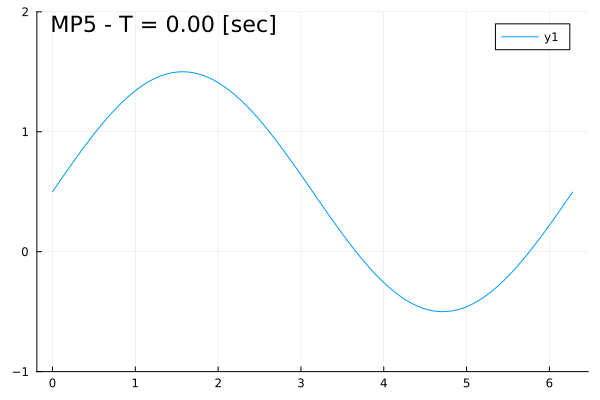

In [50]:
anim = @animate for t_index in 1:50:length(sol.t)
    t_value  =sol.t[t_index]
    plt = plot(x, sol(t_value), ylims = (-1.0,2.0))
    annotate!(plt, 0.0, 1.9, text("MP5 - T = $(@sprintf("%.2f", t_value)) [sec]", :black, :left, 15))
end
gif(anim, "Adveccion_sin_MP5.gif", fps = 30)

------
**Burgers**

In [66]:
problem = :burgers

:burgers

In [67]:
#Velocidad máxima de propagación

if problem == :advection
    SpeedMax = advectionspeed
elseif problem == :burgers
    SpeedMax = burgersspeed
end

burgersspeed (generic function with 1 method)

In [68]:

if problem == :advection
    Flux_x! = advection!
elseif problem == :burgers
    Flux_x! = burgers!
end

burgers! (generic function with 1 method)

In [97]:
N = 2000
N_FIELDS = 1

start = 0.0
stop = 2.0*pi
x = range(start, stop =stop, length = N+1)[1:end-1] #de manera que no incluya el último punto
dx = Float64(x.step)  #Δx
h = 1.0/dx
#Inicializamos el dato
u = Array{Float64}(undef, N, N_FIELDS)
du = copy(u)
@. u[:,1] = 0.5 + sin(x)
# @. u[:,1] = 1.5 + sin(x.*2.0)

#Definimos el intervalo de integración y el paso dt
T = 2.0
tspan = (0.0, T)

#CFL = dt/dx
CFL = 0.1
dt = dx * CFL

#Parámetros del problema
if problem == :advection
    eqpars = 1.0
elseif problem == :burgers
    eqpars = false
end

false

In [98]:
#Elegimos el método que queremos ver
if KurganovTadmor == true
    θ = 2.0  #Este valor tiene que estar entre 1 y 2. Mientras más cerca de 2, menor disipación.
             #Para sistemas de ecuaciones es mejor que esté más cerca de 1 para evitar oscilaciones.
    auxvectors = createKTauxvectors(N_FIELDS)
    scheme! = KT!
    par = (eqpars, h, θ, Flux_x!, SpeedMax, N, N_FIELDS, auxvectors)
    println("Elegido el método KT")
elseif MonotonicityPreserving5 == true
    auxvectors = createMP5auxvectors(N_FIELDS)
    scheme! = mp5!
    par = (eqpars, h, N, N_FIELDS, Flux_x!, SpeedMax, auxvectors)
    println("Elegido el método MP5")
end

Elegido el método MP5


In [99]:
prob = ODEProblem(scheme!,u,tspan,par);

In [100]:
# solB = solve(prob,SSPRK33(),dt=dt, saveat = T/100); # Esto es un método TVD
solB = solve(prob,SSPRK33(),dt=dt); # Esto es un método TVD


┌ Info: Saved animation to 
│   fn = f:\2022\PDE_FAMAF\GIT_Famaf_PDE\Problems\Numéricos\Tarea 4\Burgers_sin_MP5.gif
└ @ Plots C:\Users\i764\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("f:\\2022\\PDE_FAMAF\\GIT_Famaf_PDE\\Problems\\Numéricos\\Tarea 4\\Burgers_sin_MP5.gif")
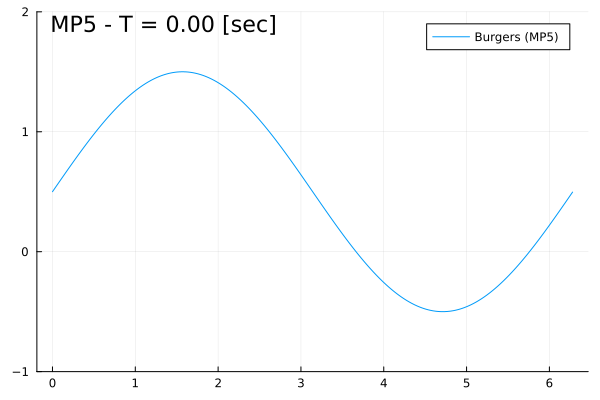

In [101]:
anim = @animate for t_index in 1:50:length(sol.t)
    t_value  =sol.t[t_index]
    plt = plot(x, solB(t_value), ylims = (-1.0,2.0),label="Burgers (MP5)")
    # plot!(plt, x, sol(t), ylims = (-1.0,2.0),label="Advection (MP5)")
    annotate!(plt, 0.0, 1.9, text("MP5 - T = $(@sprintf("%.2f", t_value)) [sec]", :black, :left, 15))
end
gif(anim, "Burgers_sin_MP5.gif", fps = 30)

**ADVECTION: Constant Velocity**

In [51]:
# Finite Difference operator 
#    PBC
function D2_pbc(du,u,dx)
    @. du[2:end-1] = (u[3:end] - u[1:end-2])/(2*dx)
    du[1] = (u[2] - u[end])/(2*dx)
    du[end] = (u[1] - u[end-1])/(2*dx)
    return du
end

# NOT PERIODIC Boundary conditions
function D2(du,u,dt)
    @. du[2:end-1] = (u[3:end] - u[1:end-2])/(2*dt) # centered 2nd order
    du[1] = (-1.5*u[1]+2.0*u[2]-0.5*u[3])/dt  # forward 2nd order
    du[end] = (1.5*u[end]-2.0*u[end-1]+0.5*u[end-2])/dt # backward 2nd order
    return du
end


D2 (generic function with 1 method)

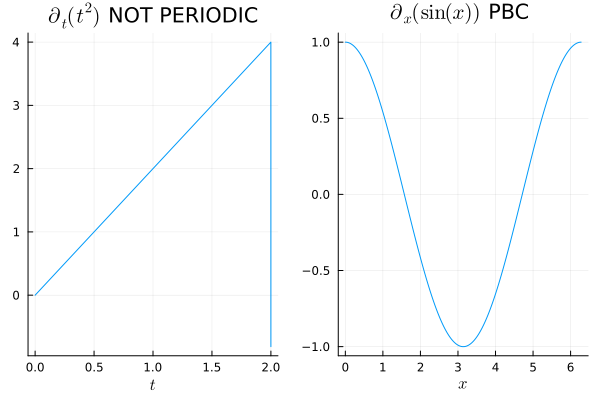

In [62]:
# tVect = 0:0.01:2
tVect = sol.t
# probamos operador sin cond. borde
func_t = tVect.^2;
∂func_t = zeros(length(tVect))
∂func_t = D2(∂func_t,func_t,dt)

# probamos operador con PBC
func_x = sin.(x);
# func_x = cos.(x);
∂func_x = zeros(length(x))
∂func_x = D2_pbc(∂func_x,func_x,dx)

# ploteamos
plot1=plot!(plot(),tVect,∂func_t,title="\$ \\partial_t(t^2)\$ NOT PERIODIC",label="",xlabel="\$t\$")
plot2=plot!(plot(),x,∂func_x,title="\$ \\partial_x(\\sin(x))\$ PBC ",label="",xlabel="\$x\$")
plot(plot1,plot2,layout=2)

In [58]:
tVect[end-2:end]
func_t[end-3:end]
∂func_t[end-3:end]

4-element Vector{Float64}:
  3.998619129489822
  3.9992474480204967
  2.3952220132128628
 -0.8134571749344939

In [63]:
function velocity_advection(sol,x,Δt,Δx)
    
    dim_row=length(sol.t)
    dim_column=length(x)

    # creamos y seteamos valores de la matriz
    u_matrix = zeros(dim_row,dim_column)
    for (t_index,t_value) in enumerate(sol.t)
        # c/fila corresponde a u(x,t) para un t fijo y ∀x
        u_matrix[t_index,:] = sol(t_value)[:]
    end

    # creamos y seteamos valores de matriz
    x_diff_matrix = zeros(dim_row,dim_column)
    for t_index in 1:dim_row
        # c/fila corresponde a ∂ₓ[u(x,t)] para un t fijo y ∀x con PBC
        x_diff_matrix[t_index,:] = D2_pbc(x_diff_matrix[t_index,:],u_matrix[t_index,:],Δx)
    end
    
    # creamos y seteamos valores de matriz
    t_diff_matrix = zeros(dim_row,dim_column)
    for x_index in 1:dim_column
        # c/fila corresponde a ∂ₜ[u(x,t)] para un x fijo y ∀t sin cond. borde
        t_diff_matrix[:,x_index] = D2(t_diff_matrix[:,x_index],u_matrix[:,x_index],Δt)
    end

    # creamos y seteamos valores de matriz
    F_matrix = zeros(dim_row,dim_column)
    # c/elemento corresponde a ∂ₜ[u(x,t)]/∂ₓ[u(x,t)]
    F_matrix .= -1.0 .* (t_diff_matrix ./ x_diff_matrix)
    return F_matrix
end


velocity_advection (generic function with 1 method)

In [89]:
velocity = velocity_advection(sol,x,dt,dx);

┌ Info: Saved animation to 
│   fn = f:\2022\PDE_FAMAF\GIT_Famaf_PDE\Problems\Numéricos\Tarea 4\Velocity_Advection.gif
└ @ Plots C:\Users\i764\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("f:\\2022\\PDE_FAMAF\\GIT_Famaf_PDE\\Problems\\Numéricos\\Tarea 4\\Velocity_Advection.gif")
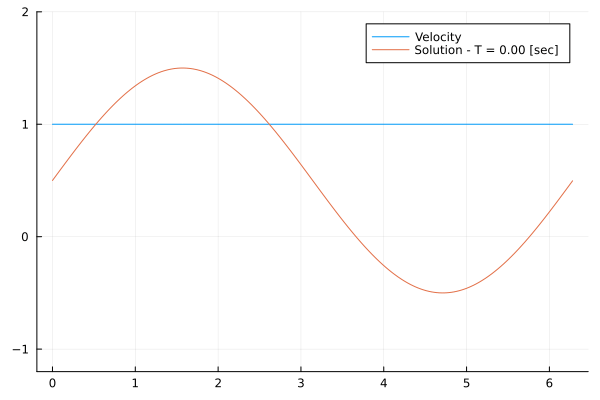

In [91]:
ymin=-1.2; ymax=2;
anim = @animate for t_index in 1:50:length(sol.t)
    t_value  =sol.t[t_index]
    plt=plot(x,velocity[t_index,:],ylims = (ymin,ymax),label="Velocity")
    
    # plt=plot(x,velocity[t_index,:])
    plot!(plt, x, sol(t_value), ylims = (ymin,ymax),label="Solution - T = $(@sprintf("%.2f",t_value)) [sec]")
    # annotate!(plt, 0.0, 4, text("T = $(@sprintf("%.2f",t_value))", :black, :left, 15))
end

gif(anim, "Velocity_Advection.gif", fps = 30)

**BURGERS: Choque**

In [309]:
SpeedMax = burgersspeed
Flux_x! = burgers!
N = 2000
N_FIELDS = 1

start = 0.0
stop = 2.0*pi
x = range(start, stop =stop, length = N+1)[1:end-1] #de manera que no incluya el último punto
dx = Float64(x.step)  #Δx
h = 1.0/dx
#Inicializamos el dato
u = Array{Float64}(undef, N, N_FIELDS)
du = copy(u)
# @. u[:,1] = 1.5 + sin(x)
@. u[:,1] = 1.5 + 0.7*cos(x+π/3)
# @. u[:,1] = -1.5 + sin(x)

#Definimos el intervalo de integración y el paso dt
T = 2.0
tspan = (0.0, T)

#CFL = dt/dx
CFL = 0.1
dt = dx * CFL

#Parámetros del problema
if problem == :advection
    eqpars = 1.0
elseif problem == :burgers
    eqpars = false
end

false

In [310]:
auxvectors = createMP5auxvectors(N_FIELDS)
scheme! = mp5!
par = (eqpars, h, N, N_FIELDS, Flux_x!, SpeedMax, auxvectors)
println("Elegido el método MP5")
prob = ODEProblem(scheme!,u,tspan,par);

Elegido el método MP5


**Shock formation**
Shock position $x_s$ accuring at $t_s$ for a point $x_i$ moving at velocity $v_i = u_i$
$$
x_s = x_i + u_it_s
$$
and for a neighbour point $x_{i+1}$ moving at velocity $v_{i+1}=u_{i+1}$
$$
x_s = x_{i+1} + u_{i+1}t_s
$$
the time of the Shock formation is
$$
t_s = \frac{\Delta x}{\min(u_i-u_{i+1})}\ \ \text{for } i = 1,2,\cdots, N
$$

In [311]:
function findShock(u,x,dx)
    # input: 
    # u: initial data for u
    ts_Arr = zeros(length(u),1)
    ts_Arr[1:end-1] .= dx./(u[1:end-1]-u[2:end])
    ts_Arr[end] = dx/(u[end]-u[1])
    IndexValMax = findmax(ts_Arr)
    ts_Arr .= ts_Arr.*(ts_Arr.>0) .+ ones(length(u),1).*abs(IndexValMax[1]).*(ts_Arr.<=0)
    # display(ts_Arr)
    tsIndexVal = findmin(ts_Arr)
    ts = tsIndexVal[1] # time to shock
    xs = x[tsIndexVal[2]]+u[tsIndexVal[2]]*ts # where the shock takes place
    return ts, xs, tsIndexVal[2][1]
end;

In [312]:
# dx_test = 0.01
# x_test = 0.0:dx_test:2.0*π
# x_test = LinRange(0.0, 2.0*π, 10)
# u_test = sin.(x_test)
# ts_test,xs_test, indexX_test = findShock(u_test,x_test,dx_test)
# plot(x_test,u_test,markershape=:circle)
# plot!([xs_test,xs_test],[-1,1],title=" $(@sprintf("%.2f",ts_test)) [sec], index: $(@sprintf("%.2f",indexX_test)), value: $(@sprintf("%.4f",xs_test)) ")
ts,xs, indexX = findShock(u[:,1],x,dx)

(1.428572211873646, 2.6664570930259743, 167)

In [313]:
solB_2 = solve(prob,SSPRK33(),dt=dt, adaptive = false); # Esto es un método TVD


**Slope $\partial _x u$**

In [314]:
dim_row = length(solB_2.t)
dim_column = length(x)

# println(dim_row)
# println(dim_column)

u_matrix = zeros(dim_row,dim_column)
for (t_index,t_value) in enumerate(solB_2.t)
    # c/fila corresponde a u(x,t) para un t fijo y ∀x
    u_matrix[t_index,:] = solB_2(t_value)[:]
end

∂solB_2_x = zeros(dim_row,dim_column)
for t_index in 1:dim_row
    # c/fila corresponde a ∂ₓ[u(x,t)] para un t fijo y ∀x con PBC
    ∂solB_2_x[t_index,:] .= D2_pbc(x_diff_matrix[t_index,:],u_matrix[t_index,:],dx)
end
# ∂solB_2_x = zeros(dim_row,dim_column)
# ∂solB_2_x = D2_pbc(∂solB_2_x,u_matrix,dx);
# size(∂solB_2_x)


┌ Info: Saved animation to 
│   fn = f:\2022\PDE_FAMAF\GIT_Famaf_PDE\Problems\Numéricos\Tarea 4\ShockFormation_BURGERS.gif
└ @ Plots C:\Users\i764\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("f:\\2022\\PDE_FAMAF\\GIT_Famaf_PDE\\Problems\\Numéricos\\Tarea 4\\ShockFormation_BURGERS.gif")
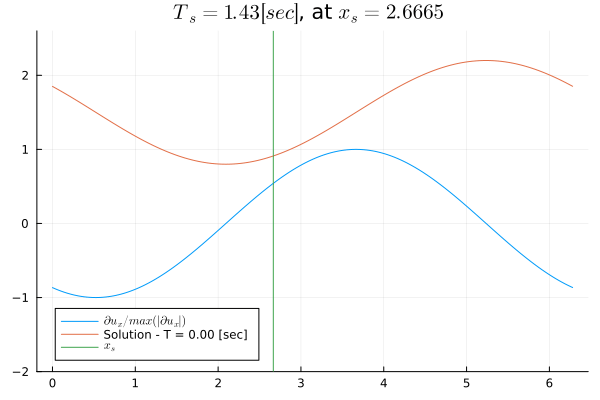

In [317]:
ymin=-2.; ymax=2.6;
anim = @animate for t_index in 1:20:length(sol.t)
    t_value  =sol.t[t_index]
    max_VelL = findmax(abs.(∂solB_2_x[t_index,:]))
    max_VelL = max_VelL[1]
    plt=plot(x,∂solB_2_x[t_index,:]./max_VelL,ylims = (ymin,ymax),label="\$∂u_x / max(|∂u_x|)\$")
    
    # plt=plot(x,velocity[t_index,:])
    plot!(plt, x, solB_2(t_value), ylims = (ymin,ymax),label="Solution - T = $(@sprintf("%.2f",t_value)) [sec]")
    plot!(plt, [xs,xs], [ymin,ymax], ylims = (ymin,ymax),label="\$ x_s\$")
    plot!(title="\$ $(@sprintf("T_s=%.2f",ts)) [sec]\$, at \$ x_s= $(@sprintf("%.4f",xs))\$ ",legend=:bottomleft)
    # annotate!(plt, 0.0, 4, text("T = $(@sprintf("%.2f",t_value))", :black, :left, 15))
end

gif(anim, "ShockFormation_BURGERS.gif", fps = 30)

------

**2)** Evolucione la ecuación de advección con ambos códigos: 

1. Compare los resultados y describa que sucede. Compare con distintos valores de $\theta$
2. Compare con lo que obtendría usando un método usual de diferencias finitas de 4to orden. 

Repita el primer punto con la ecuación de Burgers.


------
**3)** Elija un sistema en D=1 que sea de tipo conservativo e implemente un código para evolucionarlo. 
Estos dos sistemas que siguen se dan como ejemplos, pero ustedes pueden elegir cualquier otro. 
Es mejor si tienen conocimiento del comportamiento del sistema que elijan.

1. Euler: las variables son la densidad $\rho$ y el momento $p^x$, $U=(\rho, p^x)$.

$$
\begin{align*}
\dot{\rho} &=& -\partial_x(p^x) \\
\dot{p^x} &=& -\partial_x(\frac{p^x p^x}{\rho} + p_0 \rho^{\gamma})
\end{align*}
$$
Con un valor recomendado de $\gamma = 1.3$. Debe tomar un dato inicial donde $\rho$ sea positiva y no cercana a cero. La velocidad de propagación del fluido es: $c^2 = \frac{dp}{d\rho} = \gamma p/\rho$
    
2. Force-Free: las variables son el campo magnético (componente y) y el vector de Poyting (componentes x e y), $U = (S^x, S^y, B^y)$
$$
\begin{align*}

\dot{S^x} &=& -\partial_x(T^{xx}) = \partial_x(-e + B_x^2) \\
\dot{S^y} &=& -\partial_x(T^{xy}) = \partial_x(B_xB_y) \\
\dot{B^y} &=& \partial_x(v^x B^y + v^y B^x) 
\end{align*}
$$

Donde, $e = \frac{1}{2}(E_z^2 + B_x^2 + B_y^2) = \frac{1}{2}(\frac{S_x^2+S_y^2}{B_x^2+B_y^2}+B_x^2+B_y^2)$ y $v^i = \frac{S^i}{B^2}$. Para esta ecuación $B^x$ es una constante *distinta de cero*. Además $S^i$ tiene que ser perpendicular $\sum_i S^i B^i = 0$ con $\sum_i (v^i) < 1$.


-----
**AGUAS POCO PROFUNDAS (*SHALLOW WATERS*)**

Las ecuaciones de aguas poco profundas se pueden escribir en forma conservativa de la forma
$$
\begin{align*}
\frac{\partial h}{\partial t} +\frac{\partial q}{\partial x} &= 0\\
\frac{\partial q}{\partial t}+\frac{\partial}{\partial x}\left(\frac{q^2}{h}+\frac{gh^2}{2}\right) &= 0
\end{align*}
$$
donde las incógnitas son:

**el espesor de la capa** de agua, $h(x,t)$, y

**el caudal**, $q(x,t) = u(x,t)h(x,t)$ con la velocidad del fluido $u(x,t)$

$$
\begin{align*}
\frac{\partial h}{\partial t} &= -\frac{\partial q}{\partial x} \\
\frac{\partial q}{\partial t} &= -\frac{\partial}{\partial x}\left(\frac{q^2}{h}+\frac{gh^2}{2}+ghZ(x)\right)
\end{align*}
$$

In [127]:
#Flujos
function SW_FLux!(F, U, par_eq)
    g = par_eq
    F[1] = -U[2]
    F[2] = -(U[2]*U[2]/U[1] + g*U[1]*U[1]/2)
    # F[:,1] = -U[:,2]
    # F[:,2] = -(U[:,2].*U[:,2]./U[:,1] + g*U[:,1].*U[:,1]/2)
    
    
end

Flux_x! = SW_FLux!


SW_FLux! (generic function with 1 method)

In [96]:
#Flujos
function SW_FLuxZ!(F, U, par_eq, xi)
    g = par_eq
    
    Z = topologyZ(xi)
    F[1] = -U[2]
    F[2] = -(U[2]*U[2]/U[1] + g*U[1]*U[1]/2 + g*U[1]*Z)
    # F[:,1] = -U[:,2]
    # F[:,2] = -(U[:,2].*U[:,2]./U[:,1] + g*U[:,1].*U[:,1]/2)
    
    
end

Flux_x! = SW_FLuxZ!

SW_FLuxZ! (generic function with 1 method)

In [122]:
#Velocidad máxima de propagación

function SWspeed(U, c)
    return maximum(abs, U)
end

SpeedMax = SWspeed


SWspeed (generic function with 1 method)

In [150]:
N = 2000
N_FIELDS = 2

start = 0.0
stop = 2.0*pi
x = range(start, stop =stop, length = N+1)[1:end-1] #de manera que no incluya el último punto
dx = Float64(x.step)  #Δx
h = 1.0/dx
#Inicializamos el dato
u = Array{Float64}(undef, N, N_FIELDS)
du = copy(u)
# @. u[:,1] = 1.5 + sin(x)
# @. u[:,1] = .5 + 0.7*cos(x+π/3)
@. u[:,1] = .5 + 0.05*cos(x)
# @. u[:,1] = 1.0 

# @. u[:,1] = -1.5 + sin(x)

# x0=1.0
# x1 = 2.5
# p=8
# for i in 1:N
#     if x[i] > x0 && x[i] < x1
#         # u0[i] = (x[i] - x0)^p * (x[i] - x1)^p / (0.5*(x1-x0))^(2p)
#         u[i,1] = (x[i] - x0)^p * (x[i] - x1)^p / (0.5*(x1-x0))^(2p)
#     end
# end

@. u[:,2] = u[:,1]*0.0

#Definimos el intervalo de integración y el paso dt
T = 10.0
tspan = (0.0, T)

#CFL = dt/dx
CFL = 0.1
dt = dx * CFL



#Parámetros del problema
g = 9.81 # gravity acceleration

eqpars = g


9.81

In [151]:
auxvectors = createMP5auxvectors(N_FIELDS)
scheme! = mp5!
# scheme! = mp5_SW!

par = (eqpars, h, N, N_FIELDS, Flux_x!, SpeedMax, auxvectors)
println("Elegido el método MP5")

Elegido el método MP5


In [152]:
prob = ODEProblem(scheme!,u,tspan,par);

In [153]:
solSW = solve(prob,SSPRK33(),dt=dt); # Esto es un método TVD

┌ Info: Saved animation to 
│   fn = H:\2022\PDE_FAMAF\GIT_Famaf_PDE\Problems\Numéricos\Tarea 4\ShallowWaters_MP5.gif
└ @ Plots C:\Users\invmecanica-m8\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("H:\\2022\\PDE_FAMAF\\GIT_Famaf_PDE\\Problems\\Numéricos\\Tarea 4\\ShallowWaters_MP5.gif")
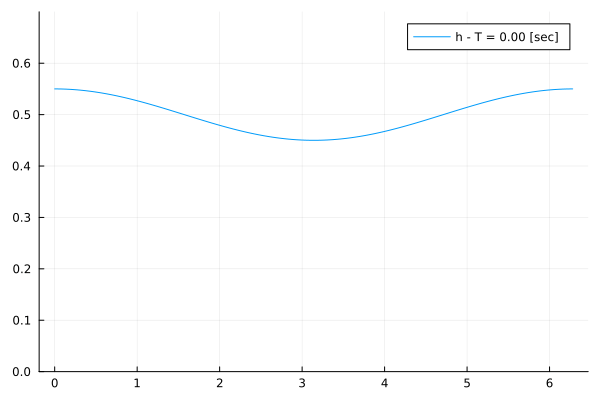

In [ ]:
ymin=.0; ymax=0.7;
Z = zeros(size(x))
for i in 1:length(x)
   Z[i] = topologyZ(x[i])
end

anim = @animate for t_index in 1:40:length(solSW.t)
    t_value  =solSW.t[t_index]
    
    # plt = plot(x, solSW[:,1,t_index], ylims = (ymin,ymax),label="h - T = $(@sprintf("%.2f",t_value)) [sec]")  
    plt = plot(x, solSW[:,1,t_index], ylims = (ymin,ymax),label="h - T = $(@sprintf("%.2f",t_value)) [sec]")  
    # plt = plot(x, solSW[:,2,t_index], ylims = (ymin,ymax),label="q - T = $(@sprintf("%.2f",t_value)) [sec]")  
    # plt = plot(x, solSW(t_value)[:,1], ylims = (ymin,ymax),label="h - T = $(@sprintf("%.2f",t_value)) [sec]")  
    
    # plt=plot(x,velocity[t_index,:])
    # plt = plot(x, y_sol[1,:], ylims = (ymin,ymax),label="h - T = $(@sprintf("%.2f",t_value)) [sec]")
    # plot!(plt, [xs,xs], [ymin,ymax], ylims = (ymin,ymax),label="\$ x_s\$")
    # plot!(title="\$ $(@sprintf("T_s=%.2f",ts)) [sec]\$, at \$ x_s= $(@sprintf("%.4f",xs))\$ ",legend=:bottomleft)
    # annotate!(plt, 0.0, 4, text("T = $(@sprintf("%.2f",t_value))", :black, :left, 15))
end

gif(anim, "ShallowWaters_MP5.gif", fps = 30)

-------
$u$: velocidad en x

$\eta$: desplazamiento vertical de la superficie libre

$h$: superficie de la topografía

$$
\begin{align*}
\frac{\partial u}{\partial t} &= \frac{\partial}{\partial x}\left(-\frac{1}{2}u^2-g\eta\right) \\
\frac{\partial \eta}{\partial t} &= \frac{\partial}{\partial x}\left(-(\eta+h)u\right)
\end{align*}
$$

In [162]:
#Flujos
function SW_FLux2!(F, U, par_eq, xi)
    g = par_eq
    h = topologyH(xi)
    F[1] = -U[1]*U[1]/2-g*U[2]
    F[2] = -(U[2] + h)*U[1]

end

Flux_x! = SW_FLux2!

SW_FLux2! (generic function with 1 method)

In [180]:
function topologyH(xi)
    x0=1.0
    x1 = 2.5
    p=8
    
    if xi > x0 && xi < x1
        h = (xi - x0)^p * (xi - x1)^p / (0.5*(x1-x0))^(2p)/4.0
        h = -h
    else
        h = 0.0
    end
    
    
    return h
end

topologyH (generic function with 1 method)

In [164]:
#Velocidad máxima de propagación

function SWspeed(U, c)
    return maximum(abs, U)
end

SpeedMax = SWspeed


SWspeed (generic function with 1 method)

In [186]:
N = 2000
N_FIELDS = 2

start = 0.0
stop = 2.0*pi
x = range(start, stop =stop, length = N+1)[1:end-1] #de manera que no incluya el último punto
dx = Float64(x.step)  #Δx
h = 1.0/dx
#Inicializamos el dato
u = Array{Float64}(undef, N, N_FIELDS)
du = copy(u)
# @. u[:,1] = 1.5 + sin(x)
# @. u[:,1] = .5 + 0.7*cos(x+π/3)
@. u[:,2] = .27 + 0.05*cos(x)
# @. u[:,1] = 1.0 

# @. u[:,1] = -1.5 + sin(x)

# x0=1.0
# x1 = 2.5
# p=8
# for i in 1:N
#     if x[i] > x0 && x[i] < x1
#         # u0[i] = (x[i] - x0)^p * (x[i] - x1)^p / (0.5*(x1-x0))^(2p)
#         u[i,1] = (x[i] - x0)^p * (x[i] - x1)^p / (0.5*(x1-x0))^(2p)
#     end
# end

@. u[:,1] = u[:,2]*0.0

#Definimos el intervalo de integración y el paso dt
T = 10.0
tspan = (0.0, T)

#CFL = dt/dx
CFL = 0.1
dt = dx * CFL



#Parámetros del problema
g = 9.81 # gravity acceleration

eqpars = g


9.81

In [187]:
auxvectors = createMP5auxvectors(N_FIELDS)
# scheme! = mp5!
scheme! = mp5_SW!

par = (eqpars, h, N, N_FIELDS, Flux_x!, SpeedMax, auxvectors)
println("Elegido el método MP5")

Elegido el método MP5


In [188]:
prob = ODEProblem(scheme!,u,tspan,par);

In [ ]:
solSW = solve(prob,SSPRK33(),dt=dt); # Esto es un método TVD

In [ ]:
ymin=-0.25; ymax=0.7;
Z = zeros(size(x))
for i in 1:length(x)
   Z[i] = topologyH(x[i])
end

anim = @animate for t_index in 1:40:length(solSW.t)
    t_value  =solSW.t[t_index]
    
    # plt = plot(x, solSW[:,1,t_index], ylims = (ymin,ymax),label="h - T = $(@sprintf("%.2f",t_value)) [sec]")  
    # plt = plot(x, solSW[:,1,t_index], ylims = (ymin,ymax),label="h - T = $(@sprintf("%.2f",t_value)) [sec]")  
    # plt = plot(x, solSW[:,2,t_index], ylims = (ymin,ymax),label="\$\eta - \$ T = $(@sprintf("%.2f",t_value)) [sec]")  
    plt = plot(x, solSW[:,2,t_index], ylims = (ymin,ymax), label="η -  T = $(@sprintf("%.2f",t_value)) [sec]")  
    plot!(plt, x, -Z)  
    # plt = plot(x, solSW(t_value)[:,1], ylims = (ymin,ymax),label="h - T = $(@sprintf("%.2f",t_value)) [sec]")  
    
    # plt=plot(x,velocity[t_index,:])
    # plt = plot(x, y_sol[1,:], ylims = (ymin,ymax),label="h - T = $(@sprintf("%.2f",t_value)) [sec]")
    # plot!(plt, [xs,xs], [ymin,ymax], ylims = (ymin,ymax),label="\$ x_s\$")
    # plot!(title="\$ $(@sprintf("T_s=%.2f",ts)) [sec]\$, at \$ x_s= $(@sprintf("%.4f",xs))\$ ",legend=:bottomleft)
    # annotate!(plt, 0.0, 4, text("T = $(@sprintf("%.2f",t_value))", :black, :left, 15))
end

gif(anim, "ShallowWaters_MP5_Topography.gif", fps = 30)